In [1]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import joblib
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Candidate: Yerramshetty Girija
Sun Sep 28 10:36:51 PM IST 2025


Candidate: Yerramshetty Girija
Sun Sep 28 10:37:56 PM IST 2025
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']
Shape: (30602, 18)
  Date received           Product                            Sub-product  \
0    03/21/2017  Credit reporting                                    NaN   
1    04/19/2017   Debt collection  Other (i.e. phone, health club, etc.)   
2    04/19/2017       Credit card                                    NaN   
3    04/14/2017          Mortgage                         Other mortgage   
4    04/19/2017       Credit card                                    NaN   

                                      Issue  \
0    Incorrect information on credit report   
1           Disclosure verificat

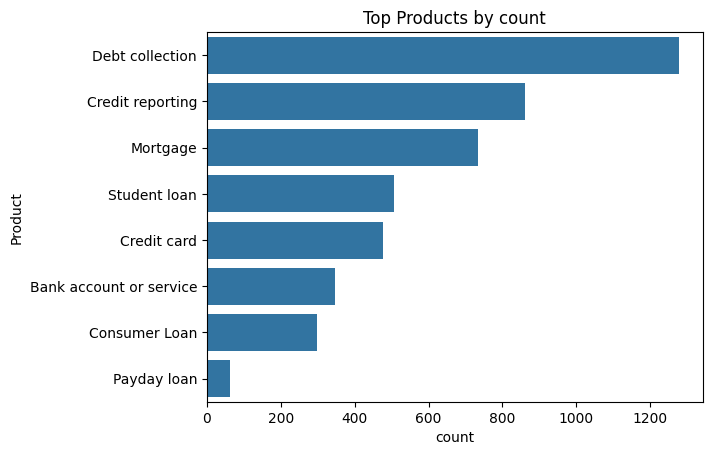

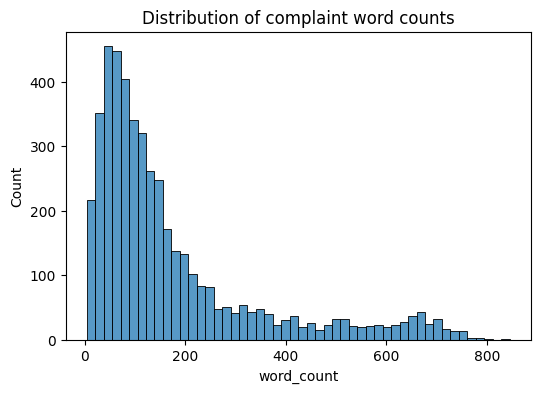

Candidate: Yerramshetty Girija
Sun Sep 28 10:37:57 PM IST 2025


In [3]:
df = pd.read_csv('/content/Consumer_Complaints.csv', low_memory=False)
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
print(df.head())
assert 'Product' in df.columns, "Product column missing"
assert 'Consumer complaint narrative' in df.columns, "Consumer complaint narrative missing"
df = df.dropna(subset=['Consumer complaint narrative']).reset_index(drop=True)
print("Top Product counts:")
print(df['Product'].value_counts().head(10))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().iloc[:8].index)
plt.title("Top Products by count")
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date
plt.show()
df['text_length'] = df['Consumer complaint narrative'].astype(str).apply(len)
df['word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(str(x).split()))
if 'Date received' in df.columns:
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    df['year_received'] = df['Date received'].dt.year
plt.figure(figsize=(6,4))
sns.histplot(df['word_count'], bins=50)
plt.title("Distribution of complaint word counts")
plt.show()
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

Mapped label distribution:
label
1    1278
0     862
2     803
3     734
Name: count, dtype: int64
Candidate: Yerramshetty Girija
Sun Sep 28 10:38:30 PM IST 2025


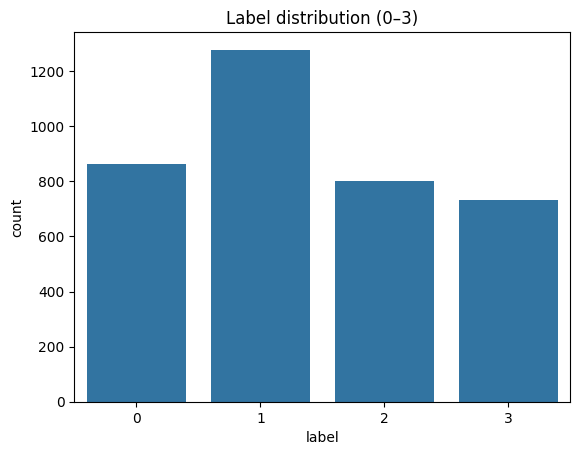

In [4]:
def product_to_label(p):
    if pd.isna(p):
        return np.nan
    pl = str(p).lower()
    if 'credit reporting' in pl or 'credit repair' in pl:
        return 0
    if 'debt collection' in pl or 'debt-collection' in pl or 'debt collection services' in pl:
        return 1
    if 'consumer loan' in pl or 'personal loan' in pl or 'auto loan' in pl or 'student loan' in pl:
        return 2
    if 'mortgage' in pl:
        return 3
    return np.nan
df['label'] = df['Product'].apply(product_to_label)
df = df.dropna(subset=['label']).copy()
df['label'] = df['label'].astype(int)
print("Mapped label distribution:")
print(df['label'].value_counts())
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date
sns.countplot(x='label', data=df)
plt.title("Label distribution (0–3)")
plt.show()

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    if pd.isna(text):
        return ""
    s = str(text).lower()
    s = re.sub(r'http\S+|www\.\S+|\S+@\S+', ' ', s)
    s = re.sub(r'[^a-z\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    tokens = [tok for tok in s.split() if tok not in stop_words and len(tok) > 1]
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens]
    return ' '.join(tokens)
df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)
print(df[['Consumer complaint narrative', 'clean_text']].head(5).to_string())
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

In [6]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

Train shape: (2941, 10000) Test shape: (736, 10000)
Candidate: Yerramshetty Girija
Sun Sep 28 10:39:11 PM IST 2025


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42)
}
results = {}
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (weighted)": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall (weighted)": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1 (weighted)": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='F1 (weighted)', ascending=False)
print("Model comparison results:")
print(results_df)
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

Training model: Logistic Regression
Training model: Random Forest
Training model: SVM
Model comparison results:
                     Accuracy  Precision (weighted)  Recall (weighted)  \
SVM                  0.873641              0.875783           0.873641   
Logistic Regression  0.872283              0.873259           0.872283   
Random Forest        0.866848              0.869038           0.866848   

                     F1 (weighted)  
SVM                       0.873697  
Logistic Regression       0.872081  
Random Forest             0.866717  
Candidate: Yerramshetty Girija
Sun Sep 28 10:40:30 PM IST 2025


Candidate: Yerramshetty Girija
Sun Sep 28 10:40:55 PM IST 2025
Best model: SVM
Classification Report:
                                       precision    recall  f1-score   support

0: Credit reporting, repair, or other       0.82      0.84      0.83       172
                   1: Debt collection       0.85      0.91      0.88       256
                     2: Consumer Loan       0.90      0.81      0.85       161
                          3: Mortgage       0.96      0.91      0.93       147

                             accuracy                           0.87       736
                            macro avg       0.88      0.87      0.87       736
                         weighted avg       0.88      0.87      0.87       736



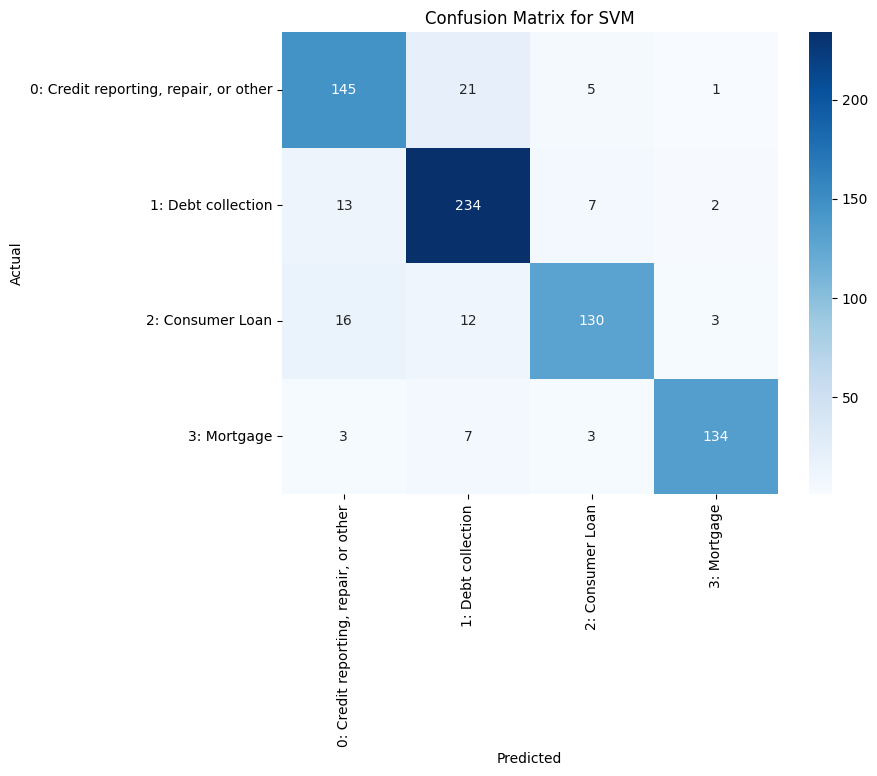

Saved model and vectorizer to /models
Candidate: Yerramshetty Girija
Sun Sep 28 10:40:58 PM IST 2025


In [8]:
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date
best_name = results_df.index[0]
best_model = models[best_name]
print("Best model:", best_name)
y_pred = best_model.predict(X_test)
target_names = [
    "0: Credit reporting, repair, or other",
    "1: Debt collection",
    "2: Consumer Loan",
    "3: Mortgage"
]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for {best_name}")
plt.show()
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "models/best_model.pkl")
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")
print("Saved model and vectorizer to /models")
import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

In [9]:
reverse_map = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}
def predict_complaints(texts, model=best_model, vectorizer=tfidf):
    cleaned = [clean_text(t) for t in texts]
    X_new = vectorizer.transform(cleaned)
    preds = model.predict(X_new)
    outputs = []
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_new)
    else:
        probs = None

    for i, t in enumerate(texts):
        lab = int(preds[i])
        out = {
            "text": t,
            "predicted_label": lab,
            "predicted_category": reverse_map.get(lab, "Unknown")
        }
        if probs is not None:
            out["probabilities"] = {reverse_map[j]: float(probs[i][j]) for j in range(probs.shape[1])}
        outputs.append(out)
    return outputs
sample_texts = [
    "The credit bureau listed accounts that are not mine and I want them removed.",
    "I’m being harassed by a debt collector calling at all hours demanding payment.",
    "I applied for a personal loan and was refused, want explanation of the decision.",
    "My mortgage servicer misapplied my payment and now they say I'm delinquent."
]
preds = predict_complaints(sample_texts)
for p in preds:
    print("Text:", p['text'])
    print("Predicted:", p['predicted_category'])
    if 'probabilities' in p:
        print("Probs:", p['probabilities'])
    print("------")
    import datetime
print("Candidate: Yerramshetty Girija")
!TZ="Asia/Kolkata" date

Text: The credit bureau listed accounts that are not mine and I want them removed.
Predicted: Credit reporting, repair, or other
Probs: {'Credit reporting, repair, or other': 0.8637291947010937, 'Debt collection': 0.13146197806515286, 'Consumer Loan': 0.004230621608428913, 'Mortgage': 0.0005782056253247325}
------
Text: I’m being harassed by a debt collector calling at all hours demanding payment.
Predicted: Debt collection
Probs: {'Credit reporting, repair, or other': 0.004132579061685273, 'Debt collection': 0.9663195114200822, 'Consumer Loan': 0.02454413745248679, 'Mortgage': 0.005003772065746128}
------
Text: I applied for a personal loan and was refused, want explanation of the decision.
Predicted: Consumer Loan
Probs: {'Credit reporting, repair, or other': 0.020908561254313764, 'Debt collection': 0.04754423219762099, 'Consumer Loan': 0.8613372883913164, 'Mortgage': 0.07020991815674908}
------
Text: My mortgage servicer misapplied my payment and now they say I'm delinquent.
Predict